# Forest fire

This notebook presents an agent-based model that simulates a forest fire.
It demonstrates how to use the [agentpy](https://agentpy.readthedocs.io) package to work with a spatial grid and create animations, and perform a parameter sweep. 

In [8]:
# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import random as random

## About the model

The model ist based on the [NetLogo FireSimple model](http://ccl.northwestern.edu/netlogo/models/FireSimple) by Uri Wilensky and William Rand, who describe it as follows:

> "This model simulates the spread of a fire through a forest. It shows that the fire's chance of reaching the right edge of the forest depends critically on the density of trees. This is an example of a common feature of complex systems, the presence of a non-linear threshold or critical parameter. [...] 
>
> The fire starts on the left edge of the forest, and spreads to neighboring trees. The fire spreads in four directions: north, east, south, and west.
>
>The model assumes there is no wind. So, the fire must have trees along its path in order to advance. That is, the fire cannot skip over an unwooded area (patch), so such a patch blocks the fire's motion in that direction."

## Model definition

## Single-run animation

In [9]:
class RoomModel(ap.Model):
    
    def setup(self):
        
        # Create agents 
        n_trash = int(self.p['Trash density'] * (self.p.size**2))
        trash = self.agents = ap.AgentList(self, n_trash)
        
        n_robot = int(self.p['Robots'])
        robot = self.agents2 = ap.AgentList(self, n_robot)
        # Create grid 
        self.room = ap.Grid(self, [self.p.size]*2, track_empty=True)      
        self.room.add_agents(trash, random=True, empty=True)
        self.room.add_agents(robot,  positions=[(1,1) for i in range(self.p["Robots"])])
        
        # Initiate a dynamic variable for all trees
        # Condition 0: Dirty, 1: Cleaning, 2: clean
        self.agents.condition = 0 
        self.agents2.condition = 0 
        
        # Start a fire from the left side of the grid
        cleaning_robot = self.room.agents[(1,1),(1,1)]
        cleaning_robot.condition = 1
        
    def step(self):
        # Condition 0: Brown, 1: Robot Cyan, 2: White
        # Select burning trees
        
        robotMovement = 0
        cleaned_trash = self.agents.select(self.agents.condition == 1)
        robots = self.agents2.select(self.agents2.condition == 1)

        # Spread fire 
        for robot in robots:
            for neighbor in self.room.neighbors(robot):
                if neighbor.condition == 0:
                    neighbor.condition = 3
                if neighbor.condition == 2:
                    self.room.move_by(robot,(0))
                    cleaned_trash.condition = 3
            self.room.move_by(robot,(random.randrange(-1,2),random.randrange(-1,2)))
            robotMovement +=1 
        
        
        cleaned_trash = self.agents.select(self.agents.condition == 3)
        # Stop simulation if no fire is left
        if len(cleaned_trash) == 0: 
            self.stop()
        
        
      
        # Document a measure at the end of the simulation
        cleaned = len(self.agents.select(self.agents.condition == 1))
        self.report('Percentage of cleaned trash', cleaned / len(self.agents))
        self.report('Steps', model.t)
        self.report('Movements', robotMovement)
        self.reporters
    pass 


In [10]:
# Define parameters


parameters = {
    'Trash density': 0.70, # Percentage of grid covered by trees
    'size': 30, # Height and length of the grid
    'steps': 300,
    'Robots': 300,
}

In [11]:
# Create single-run animation with custom colors

def animation_plot(model, ax):
    attr_grid = model.room.attr_grid('condition')
    color_dict = {0:'#6e5930', 1:'#44b3af', 3:'#d5e5d5', None:'#d5e5d5'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulation of a cleaning trash\n"
                 f"Time-step: {model.t}, Trash left: "
                 f"{len(model.agents.select(model.agents.condition == 0))}")

fig, ax = plt.subplots() 
model = RoomModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))

In [12]:
model.reporters

{'seed': 245598070424270266374940410232354619415,
 'Percentage of cleaned trash': 0.0015873015873015873,
 'Steps': 299,
 'Movements': 1}

## Parameter sweep

In [13]:
# Prepare parameter sample
parameters = {
    'Trash density': ap.Range(0.2, 0.6), 
    'size': 100,
    'Robots': 100
}
sample = ap.Sample(parameters, n=30)

In [14]:
# Save and load data
results.save()
results = ap.DataDict.load('ForestModel')

NameError: name 'results' is not defined

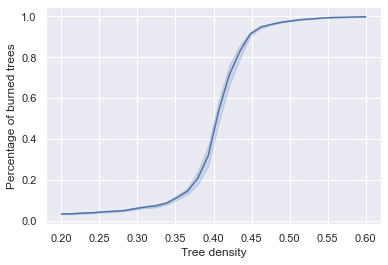

In [ ]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(), 
    x='Tree density', 
    y='Percentage of burned trees'
);